In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./climate_change_data.csv',parse_dates=['Date'])
data.head(10)

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164
5,2000-01-05 04:48:36.291629162,South Nathan,Saint Helena,6.229326,392.473317,1.122210,76.368331,48.973886,30.398908
6,2000-01-06 00:58:19.549954995,Port Richardfurt,Tuvalu,21.646738,387.648437,0.058471,9.650389,11.402284,15.720944
7,2000-01-06 21:08:02.808280828,Adambury,Australia,19.730800,448.180275,0.001415,93.360755,21.526350,29.993495
8,2000-01-07 17:17:46.066606660,Williamsonberg,Qatar,19.858114,379.618820,0.584881,6.218846,30.861949,37.519472
9,2000-01-08 13:27:29.324932493,North Thomas,Chad,14.121563,410.517072,-1.712224,15.351583,88.422794,47.922521


In [3]:
data.size

90000

In [4]:
data.shape

(10000, 9)

In [5]:
data.columns

Index(['Date', 'Location', 'Country', 'Temperature', 'CO2 Emissions',
       'Sea Level Rise', 'Precipitation', 'Humidity', 'Wind Speed'],
      dtype='object')

In [6]:
data.isnull().sum()

Date              0
Location          0
Country           0
Temperature       0
CO2 Emissions     0
Sea Level Rise    0
Precipitation     0
Humidity          0
Wind Speed        0
dtype: int64

In [7]:
data["Year"]=data.Date.dt.year
data["Month"]=data.Date.dt.month
data["Day"]=data.Date.dt.day
data["Time"]=data.Date.dt.time

In [8]:
data.rename(columns={'CO2 Emissions':'CO2_Emissions','Sea Level Rise':'Sea_Level_Rise','Wind Speed':'Wind_Speed'}, inplace=True)

In [9]:
data.head()

,Date,Location,Country,Temperature,CO2_Emissions,Sea_Level_Rise,Precipitation,Humidity,Wind_Speed,Year,Month,Day,Time
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026,2000,1,1,00:00:00
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300,2000,1,1,20:09:43.258325
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261,2000,1,2,16:19:26.516651
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563,2000,1,3,12:29:09.774977
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164,2000,1,4,08:38:53.033303


In [10]:
data.drop(columns='Date',inplace=True)
data.head()

,Location,Country,Temperature,CO2_Emissions,Sea_Level_Rise,Precipitation,Humidity,Wind_Speed,Year,Month,Day,Time
0,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026,2000,1,1,00:00:00
1,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300,2000,1,1,20:09:43.258325
2,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261,2000,1,2,16:19:26.516651
3,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563,2000,1,3,12:29:09.774977
4,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164,2000,1,4,08:38:53.033303


In [11]:
data.value_counts()

Location        Country                Temperature  CO2_Emissions  Sea_Level_Rise  Precipitation  Humidity   Wind_Speed  Year  Month  Day  Time           
Aaronberg       France                 14.976998    406.437367      0.851594       3.337966       88.162996  2.952806    2002  3      3    04:46:52.601260    1
Port Chelsea    Jamaica                18.214684    395.163028     -1.052494       18.240583      7.255567   6.380022    2008  6      10   02:35:58.055805    1
Port Catherine  Portugal               7.926596     349.517680      0.925205       73.819145      31.854684  10.435009   2003  4      29   18:16:31.539153    1
                Reunion                9.445787     422.917241      0.989807       50.257037      26.761362  5.634868    2009  7      10   18:54:32.727272    1
Port Charles    Algeria                9.787307     397.884393      1.159498       55.089545      89.959624  25.561192   2013  12     7    05:29:38.937893    1
                                             

In [12]:
data.nunique()

Location           7764
Country             243
Temperature       10000
CO2_Emissions     10000
Sea_Level_Rise    10000
Precipitation     10000
Humidity          10000
Wind_Speed        10000
Year                 23
Month                12
Day                  31
Time               3470
dtype: int64

### 1. Country that have the most CO2 emission

In [13]:
high_co2 = data.groupby(['Country'])['CO2_Emissions'].sum()
high_co2.max()

38067.60646996342

In [14]:
high_co2.sort_values(ascending=False)

Country
Congo                        38067.606470
Korea                        30153.056279
Tanzania                     23563.231008
Armenia                      23053.890323
Georgia                      22829.104137
                                 ...     
Chile                        11382.924078
Saint Pierre and Miquelon    11165.304924
Dominican Republic           11045.762010
Syrian Arab Republic         10675.568700
Saint Kitts and Nevis         9106.386105
Name: CO2_Emissions, Length: 243, dtype: float64

### Country and CO2 emission

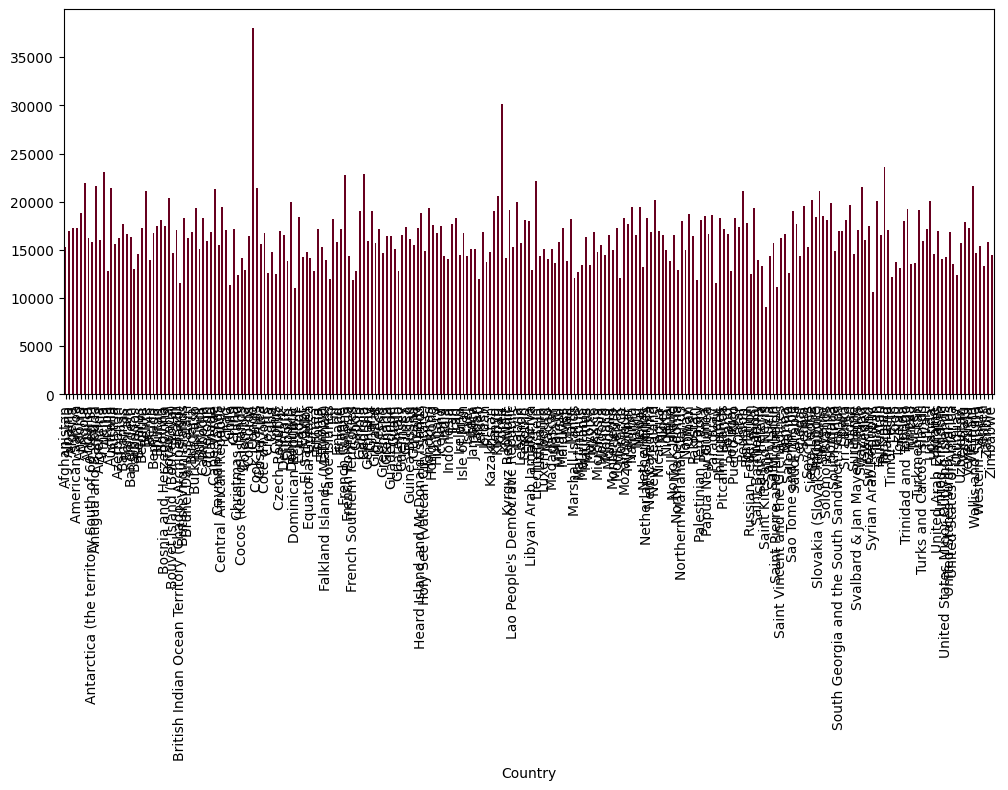

In [15]:
high_co2.plot.bar(figsize=(12,5),cmap='RdGy');

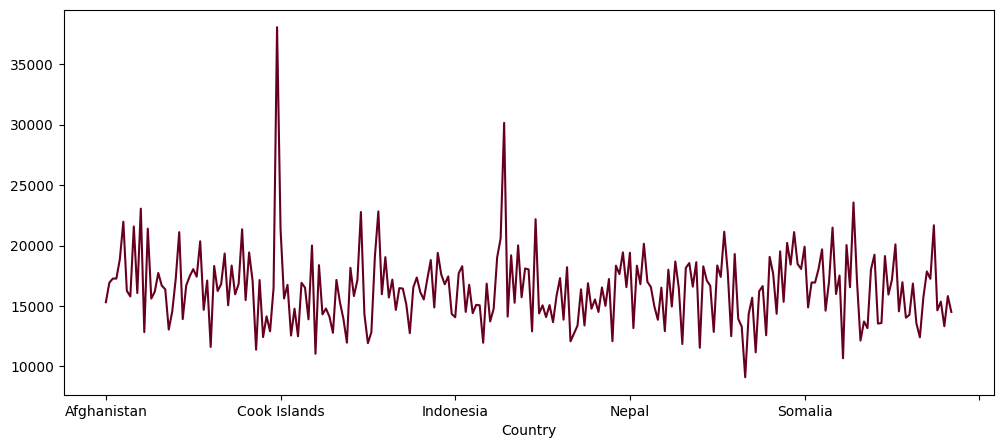

In [16]:
high_co2.plot.line(figsize=(12,5),cmap='RdGy');

### 2.High temp year

In [17]:
data.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022], dtype=int64)

In [18]:
high_temp_year = data.groupby(['Year'])['Temperature']
high_temp_year

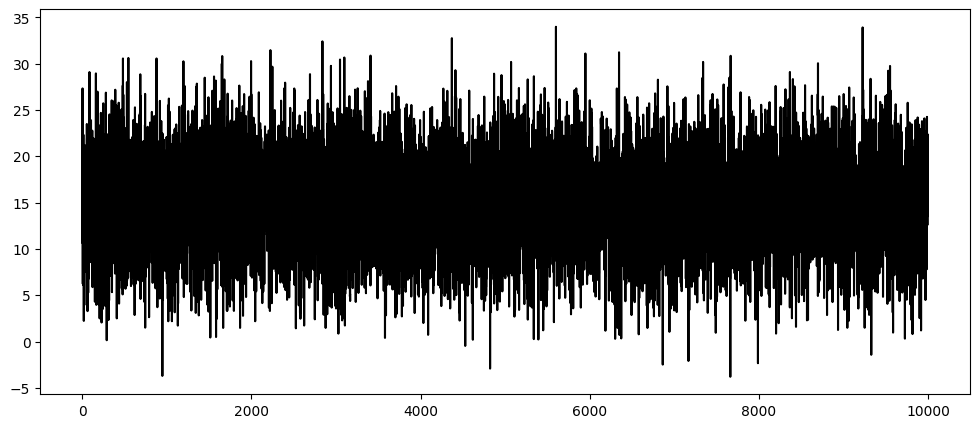

In [19]:
high_temp_year.plot.line(figsize=(12,5),cmap='cubehelix');

In [20]:
data.head()

,Location,Country,Temperature,CO2_Emissions,Sea_Level_Rise,Precipitation,Humidity,Wind_Speed,Year,Month,Day,Time
0,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026,2000,1,1,00:00:00
1,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300,2000,1,1,20:09:43.258325
2,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261,2000,1,2,16:19:26.516651
3,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563,2000,1,3,12:29:09.774977
4,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164,2000,1,4,08:38:53.033303


### 3.highest temp,sealevel rise,wind speed and humidity year

In [21]:
data.Temperature.max()


33.97695597775728

In [22]:
data.Sea_Level_Rise.max()

4.116558983659821

In [23]:
data.Wind_Speed.max()

49.99766399410564

In [24]:
data.Humidity.max()

99.95966453034534

In [25]:
all_high_year=data.query("Temperature>33 & Sea_Level_Rise>4 & Wind_Speed>49 & Humidity>99 ")
all_high_year

,Location,Country,Temperature,CO2_Emissions,Sea_Level_Rise,Precipitation,Humidity,Wind_Speed,Year,Month,Day,Time


In [26]:
data.Location.nunique()

7764

In [27]:
data.Country.nunique()

243

In [28]:
data.Country.value_counts()

Congo                        94
Korea                        76
Tanzania                     61
Armenia                      58
French Guiana                58
                             ..
Saint Pierre and Miquelon    28
Chile                        28
Dominican Republic           28
Syrian Arab Republic         27
Saint Kitts and Nevis        23
Name: Country, Length: 243, dtype: int64

In [29]:
data.Month.value_counts()

1     849
3     849
5     849
8     849
10    849
12    849
7     848
4     822
6     822
9     821
11    821
2     772
Name: Month, dtype: int64

In [30]:
data.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022], dtype=int64)

In [31]:
data.Country.unique()

array(['Latvia', 'South Africa', 'French Guiana', 'Vietnam', 'Moldova',
       'Saint Helena', 'Tuvalu', 'Australia', 'Qatar', 'Chad', 'Fiji',
       'Guernsey', 'Egypt', 'Rwanda', 'Samoa', 'Mongolia',
       'Equatorial Guinea', 'Libyan Arab Jamahiriya', 'Mali',
       'Cocos (Keeling) Islands', 'Bahrain',
       'French Southern Territories', 'Iceland', 'Tajikistan',
       'Norfolk Island', 'Bosnia and Herzegovina', 'Reunion', 'Ethiopia',
       'Spain', 'Italy', 'Andorra', 'Gibraltar', 'Monaco', 'Comoros',
       'British Indian Ocean Territory (Chagos Archipelago)',
       'Czech Republic', 'Iran', 'Antigua and Barbuda', 'Seychelles',
       'Slovenia', 'Gabon', 'India', 'Congo', 'Tunisia', 'Costa Rica',
       'Cuba', 'Grenada', 'Suriname', 'Brunei Darussalam',
       'United States of America', 'Israel', 'Georgia', 'Cape Verde',
       'Ukraine', 'Colombia', 'Guyana', 'Estonia', 'Cambodia', 'Maldives',
       'Greece', 'Kenya', 'Marshall Islands', 'Korea', 'Dominica',
       'Ch

### 4.Temp change in the year of 2022

In [32]:
temp_2022_iceland=data.query("Country=='Iceland' & Year==2022")
temp_2022_iceland

,Location,Country,Temperature,CO2_Emissions,Sea_Level_Rise,Precipitation,Humidity,Wind_Speed,Year,Month,Day,Time
9694,Jamiemouth,Iceland,9.644401,422.741097,-0.974107,31.802444,59.453242,30.235533,2022,4,18,18:35:06.210621


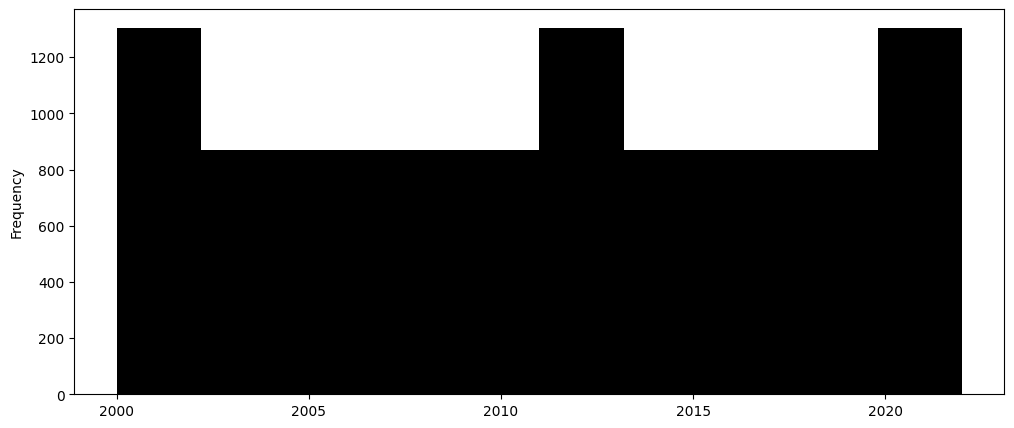

In [33]:
data.Year.plot.hist(figsize=(12,5),subplots=True,cmap='gist_earth');

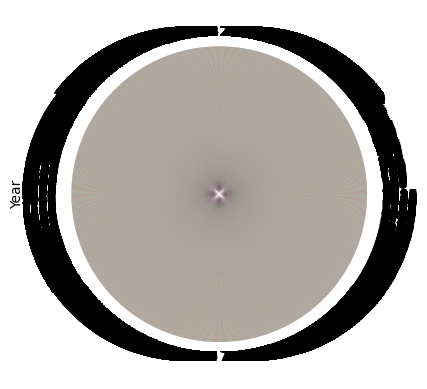

In [34]:
data.Year.plot.pie();

In [35]:
temp_2022=data.query("Year==2022")
temp_2022

,Location,Country,Temperature,CO2_Emissions,Sea_Level_Rise,Precipitation,Humidity,Wind_Speed,Year,Month,Day,Time
9566,Anneshire,Puerto Rico,15.048130,426.708313,-1.871958,73.368891,78.431812,21.208365,2022,1,1,05:50:49.144914
9567,Bobbymouth,Myanmar,11.235506,443.728696,0.813752,42.528332,32.507960,17.492638,2022,1,2,02:00:32.403240
9568,Bradleyfort,Tuvalu,15.986969,376.713789,1.137202,30.937883,85.068081,31.344799,2022,1,2,22:10:15.661566
9569,Alexanderland,Mauritania,14.673414,407.340920,0.837738,93.453042,40.498572,6.347788,2022,1,3,18:19:58.919891
9570,South Alyssa,Oman,6.791144,376.344501,0.288591,78.108959,50.565335,42.204860,2022,1,4,14:29:42.178217
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,South Elaineberg,Bhutan,15.020523,391.379537,-1.452243,93.417109,25.293814,6.531866,2022,12,27,15:21:06.966696
9996,Leblancville,Congo,16.772451,346.921190,0.543616,49.882947,96.787402,42.249014,2022,12,28,11:30:50.225022
9997,West Stephanie,Argentina,22.370025,466.042136,1.026704,30.659841,15.211825,18.293708,2022,12,29,07:40:33.483348
9998,Port Steven,Albania,19.430853,337.899776,-0.895329,18.932275,82.774520,42.424255,2022,12,30,03:50:16.741674


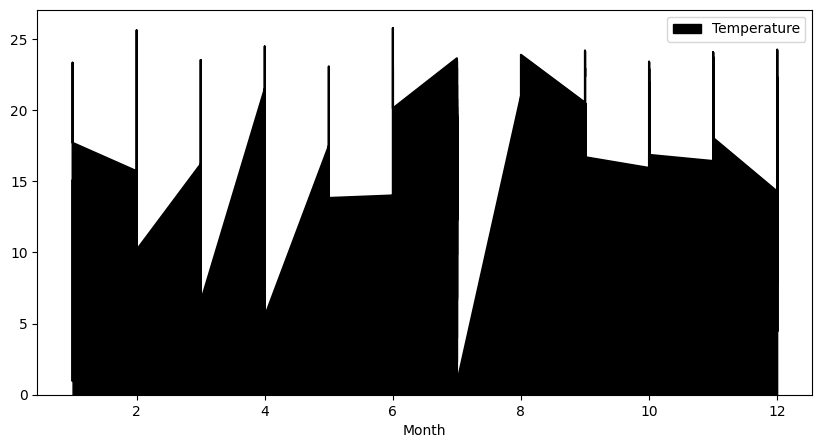

In [36]:
temp_2022.plot.area('Month','Temperature',figsize=(10,5),cmap='copper');

In [37]:
temp_2022.Month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [38]:
temp_2022_10month=temp_2022.query("Month==10")
temp_2022_10month

,Location,Country,Temperature,CO2_Emissions,Sea_Level_Rise,Precipitation,Humidity,Wind_Speed,Year,Month,Day,Time
9891,New Donald,Congo,15.946857,400.622551,0.597057,36.613858,24.519511,4.347717,2022,10,1,06:30:08.100809
9892,West Ryan,Palestinian Territory,19.189373,393.243828,0.616998,15.659305,40.117446,8.098578,2022,10,2,02:39:51.359135
9893,Port Elizabeth,Cote d'Ivoire,18.208055,337.519740,1.217790,81.776067,1.837609,23.494978,2022,10,2,22:49:34.617461
9894,Courtneyview,Serbia,10.047940,407.579351,-1.513995,32.331168,22.128426,20.556017,2022,10,3,18:59:17.875787
9895,Lake Jesusport,Azerbaijan,23.411845,371.601992,0.361839,4.876131,57.463657,44.201057,2022,10,4,15:09:01.134113
9896,North Kathryn,Taiwan,9.504194,421.109639,0.916716,11.060173,45.264495,47.817169,2022,10,5,11:18:44.392439
9897,Lyonsside,Barbados,20.866716,387.811181,0.024178,19.746814,79.763373,29.041892,2022,10,6,07:28:27.650765
9898,Anthonyton,Ecuador,13.895339,485.730415,-1.595976,1.817565,72.072464,49.725343,2022,10,7,03:38:10.909090
9899,Clinechester,Brazil,11.867522,307.407410,-0.675365,10.184360,73.201044,13.272714,2022,10,7,23:47:54.167416
9900,East Johnfurt,Palestinian Territory,9.373413,410.767720,-0.384032,49.140299,87.692271,19.059626,2022,10,8,19:57:37.425742


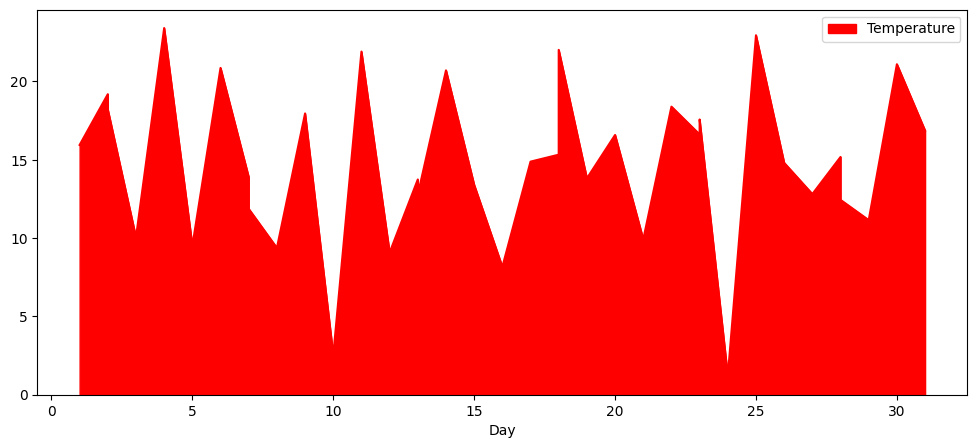

In [39]:
temp_2022_10month.plot.area('Day','Temperature',figsize=(12,5),cmap='flag');

In [40]:
data.Country.unique()

array(['Latvia', 'South Africa', 'French Guiana', 'Vietnam', 'Moldova',
       'Saint Helena', 'Tuvalu', 'Australia', 'Qatar', 'Chad', 'Fiji',
       'Guernsey', 'Egypt', 'Rwanda', 'Samoa', 'Mongolia',
       'Equatorial Guinea', 'Libyan Arab Jamahiriya', 'Mali',
       'Cocos (Keeling) Islands', 'Bahrain',
       'French Southern Territories', 'Iceland', 'Tajikistan',
       'Norfolk Island', 'Bosnia and Herzegovina', 'Reunion', 'Ethiopia',
       'Spain', 'Italy', 'Andorra', 'Gibraltar', 'Monaco', 'Comoros',
       'British Indian Ocean Territory (Chagos Archipelago)',
       'Czech Republic', 'Iran', 'Antigua and Barbuda', 'Seychelles',
       'Slovenia', 'Gabon', 'India', 'Congo', 'Tunisia', 'Costa Rica',
       'Cuba', 'Grenada', 'Suriname', 'Brunei Darussalam',
       'United States of America', 'Israel', 'Georgia', 'Cape Verde',
       'Ukraine', 'Colombia', 'Guyana', 'Estonia', 'Cambodia', 'Maldives',
       'Greece', 'Kenya', 'Marshall Islands', 'Korea', 'Dominica',
       'Ch

In [41]:
india_humidity_change_2022=data.query("Country=='India' & Year==2022")
india_humidity_change_2022

,Location,Country,Temperature,CO2_Emissions,Sea_Level_Rise,Precipitation,Humidity,Wind_Speed,Year,Month,Day,Time
9589,West Nicoleburgh,India,19.057824,386.084043,0.307839,69.606269,42.153773,21.645338,2022,1,20,13:34:24.086408
9713,Longview,India,9.903226,458.566159,-1.206748,57.588559,44.788664,7.515474,2022,5,4,17:39:48.118811


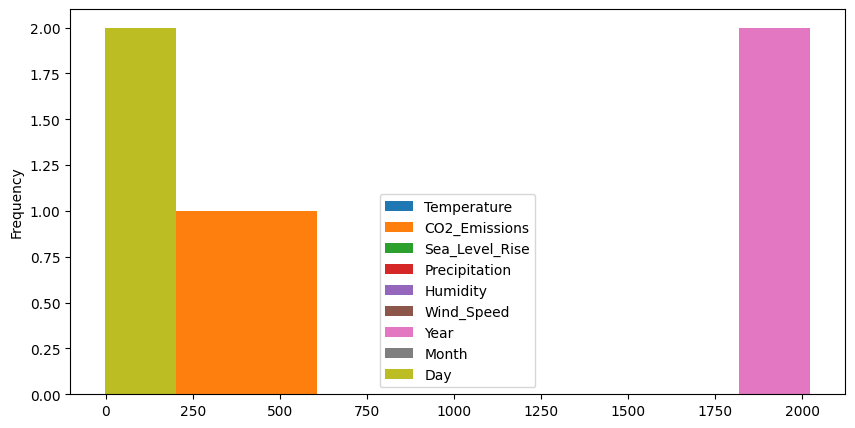

In [42]:
india_humidity_change_2022.plot.hist(figsize=(10,5));

In [43]:
india_climate_change=data.query("Country=='India'")
india_climate_change

,Location,Country,Temperature,CO2_Emissions,Sea_Level_Rise,Precipitation,Humidity,Wind_Speed,Year,Month,Day,Time
44,Stewartbury,India,13.863784,408.121863,-0.078811,77.498661,31.356005,26.264121,2000,2,6,23:07:43.366336
153,Port Jesus,India,14.563792,441.458510,0.012392,72.783893,64.897858,44.925654,2000,5,8,12:47:18.523852
420,Lake Heather,India,8.050407,352.500027,-1.081892,85.429837,90.573097,33.954562,2000,12,18,20:02:48.496849
604,Port Haydentown,India,12.435437,380.040060,-0.376124,92.218718,7.455810,41.320736,2001,5,22,09:51:28.028802
626,Marisafort,India,19.580143,412.246774,1.490122,55.683053,63.584592,44.651892,2001,6,9,21:25:19.711971
754,Jacobland,India,18.290347,312.602899,-0.556386,29.791763,29.240185,47.933234,2001,9,25,10:09:36.777677
764,South Kimberlyshire,India,12.013457,334.323596,-0.046268,55.820262,98.889572,32.544557,2001,10,3,19:46:49.360936
1437,New David,India,8.794670,352.886364,-0.773098,98.618001,99.591771,49.080657,2003,4,22,04:49:02.214221
2589,South Robertstad,India,18.649079,417.644878,-0.488305,74.032718,20.658963,43.859921,2005,12,14,23:27:35.805580
2805,Bowersfurt,India,15.702748,462.738893,-1.027062,67.324433,39.692066,27.317580,2006,6,14,10:27:19.603960


In [44]:
india_climate_change.nunique()

Location          36
Country            1
Temperature       36
CO2_Emissions     36
Sea_Level_Rise    36
Precipitation     36
Humidity          36
Wind_Speed        36
Year              17
Month             12
Day               19
Time              36
dtype: int64

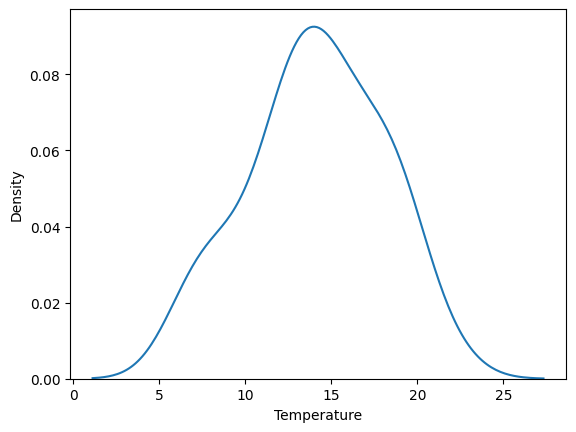

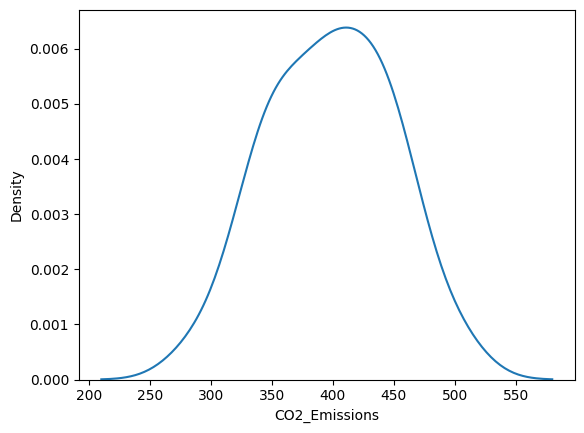

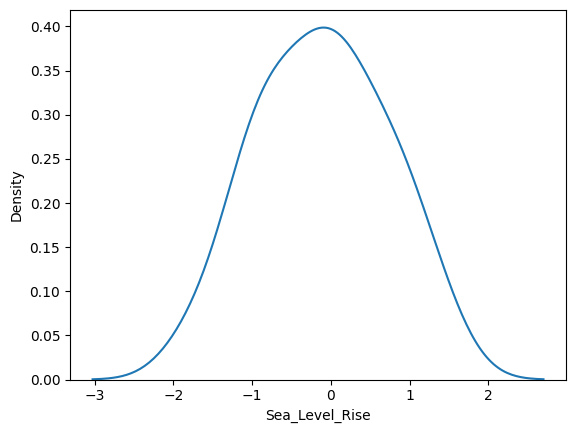

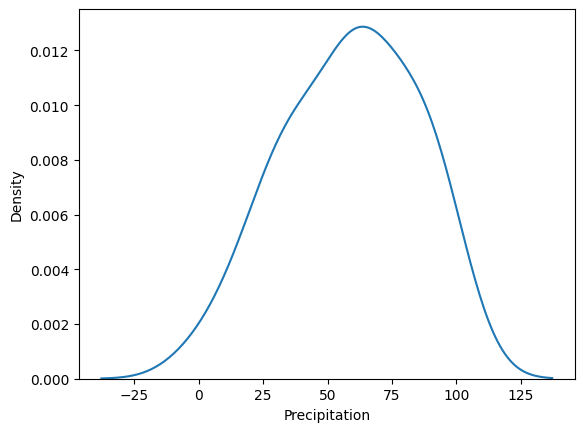

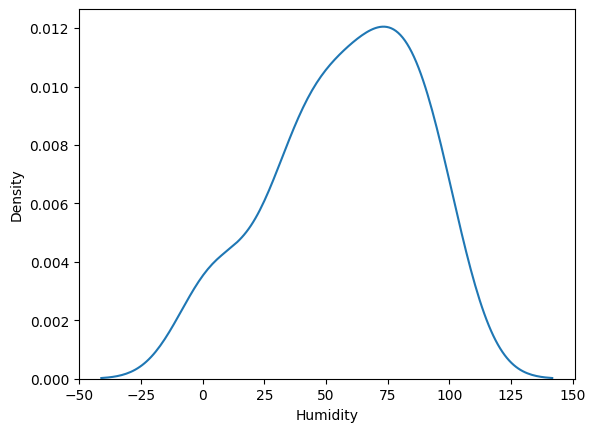

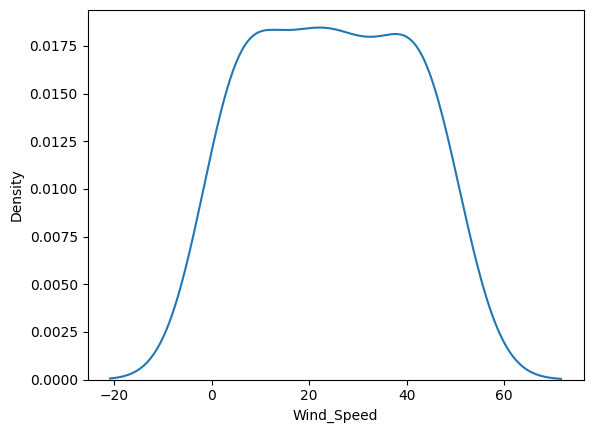

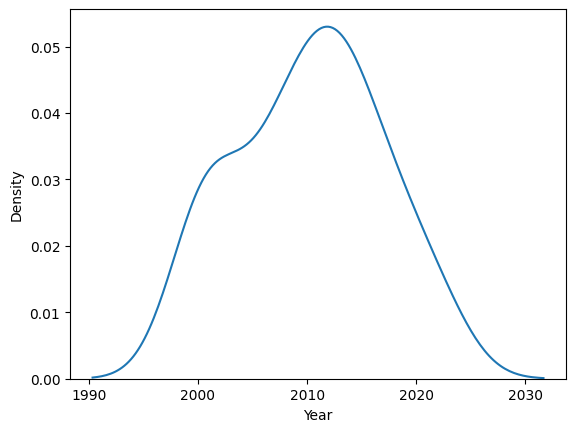

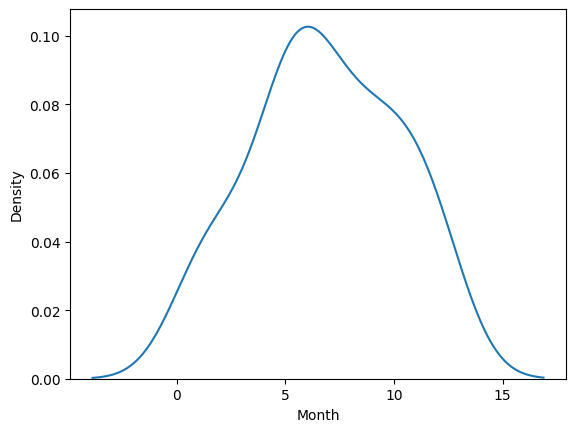

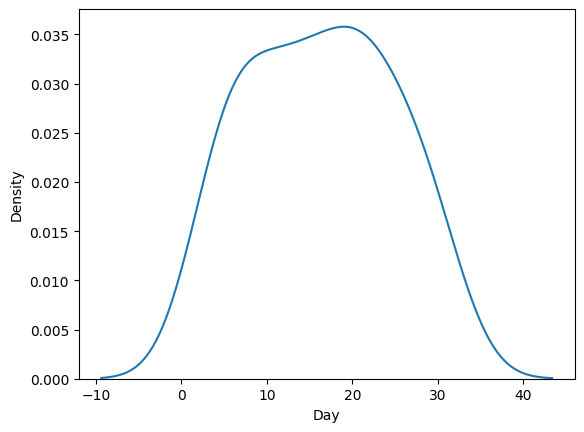

In [45]:
for i in india_climate_change.columns:
    if india_climate_change[i].dtypes != 'object':
        if india_climate_change[i].dtypes != '<M8[ns]':
            sns.kdeplot(x= india_climate_change[i])
            plt.show()

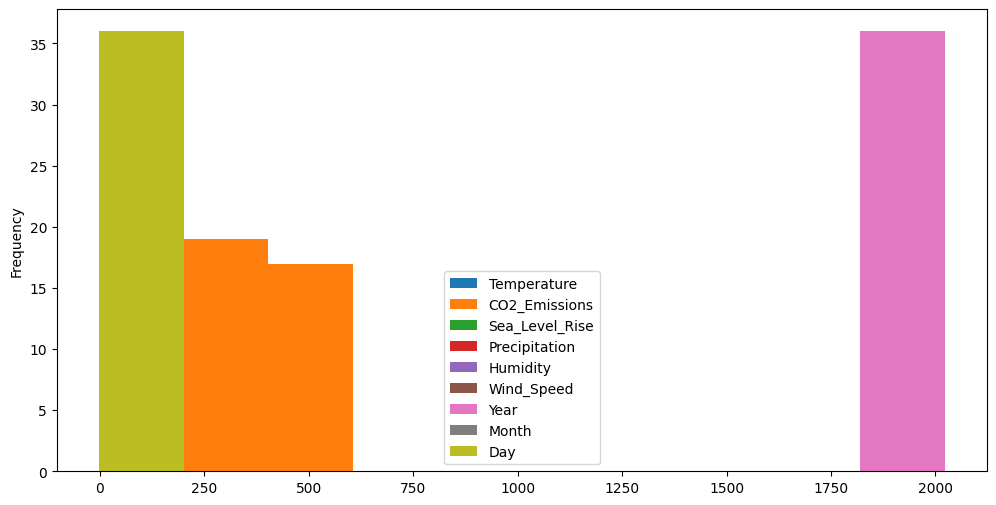

In [46]:
india_climate_change.plot.hist(figsize=(12,6));

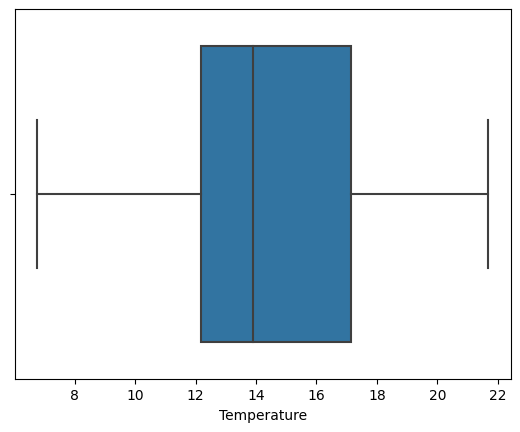

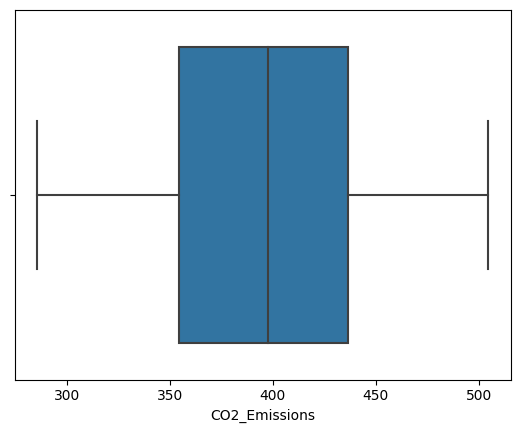

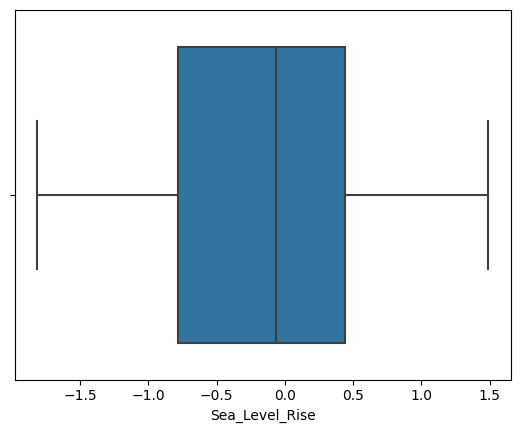

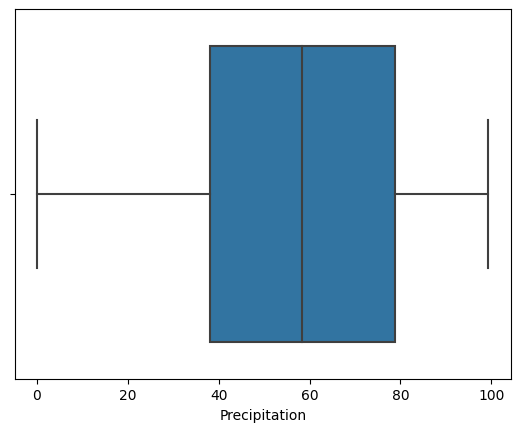

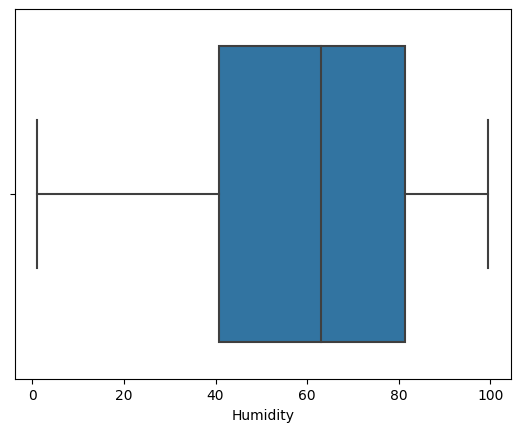

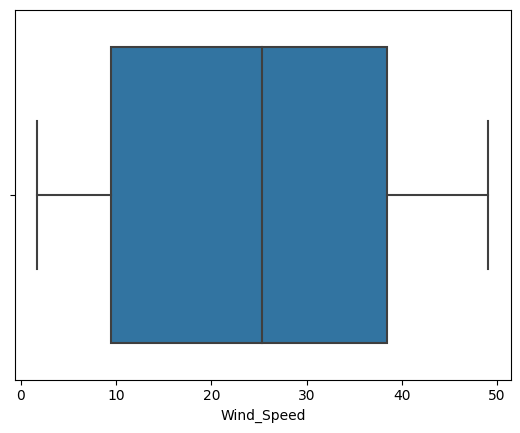

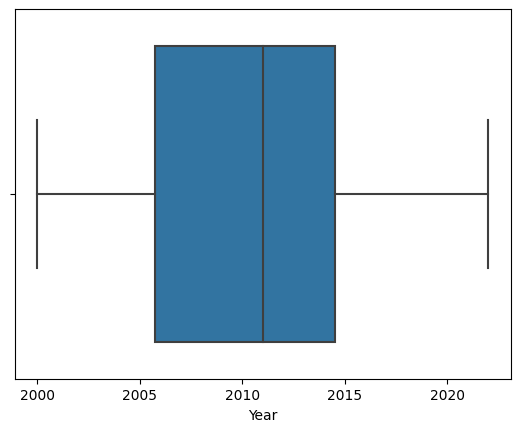

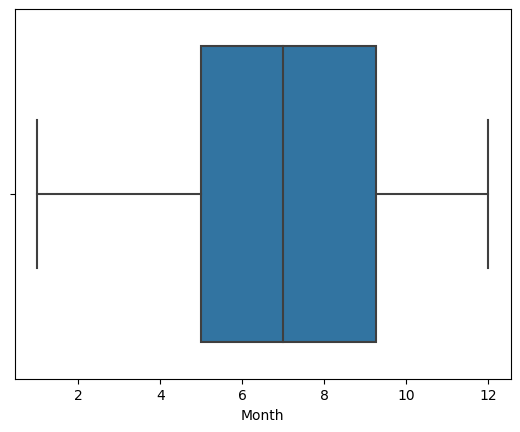

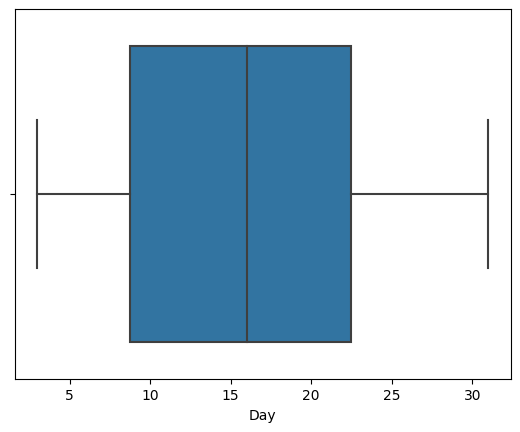

In [47]:
for i in india_climate_change.columns:
    if india_climate_change[i].dtypes != 'object':
        if india_climate_change[i].dtypes != '<M8[ns]':
            sns.boxplot(x= india_climate_change[i])
            plt.show()

In [48]:
data.head()

,Location,Country,Temperature,CO2_Emissions,Sea_Level_Rise,Precipitation,Humidity,Wind_Speed,Year,Month,Day,Time
0,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026,2000,1,1,00:00:00
1,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300,2000,1,1,20:09:43.258325
2,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261,2000,1,2,16:19:26.516651
3,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563,2000,1,3,12:29:09.774977
4,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164,2000,1,4,08:38:53.033303


In [49]:
south_africa=data.query("Country=='South Africa'")
south_africa

,Location,Country,Temperature,CO2_Emissions,Sea_Level_Rise,Precipitation,Humidity,Wind_Speed,Year,Month,Day,Time
1,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300,2000,1,1,20:09:43.258325
214,Jessicatown,South Africa,12.406180,365.764875,1.586308,46.868024,52.948257,47.329501,2000,6,28,18:40:17.281728
624,Stevenburgh,South Africa,12.778918,360.570508,2.291537,78.568437,54.779141,39.568239,2001,6,8,05:05:53.195319
738,Sarafurt,South Africa,15.770152,398.566044,-1.177339,34.192164,11.869819,35.270217,2001,9,11,23:34:04.644464
746,North Jeffrey,South Africa,20.119819,351.515710,-0.619316,97.915440,61.674733,15.802414,2001,9,18,16:51:50.711071
2008,Lake Tony,South Africa,12.585084,403.479318,-0.285615,97.405528,81.914204,22.242468,2004,8,13,21:19:42.718271
2134,West Aprilville,South Africa,18.773436,377.708301,-0.675407,41.848454,14.607840,20.263078,2004,11,27,17:44:33.267326
2438,Port Jennifermouth,South Africa,18.967103,486.170905,0.104958,43.989193,45.847595,7.641343,2005,8,10,02:59:43.798379
3197,Alexanderfurt,South Africa,5.769822,477.889118,0.673830,31.290201,33.088087,0.519657,2007,5,9,17:57:56.867686
3369,Lake Phyllisfort,South Africa,16.527550,389.249130,-1.042507,33.876320,66.269588,6.210160,2007,10,1,05:49:57.299729


In [50]:
south_africa.Location.nunique()

37

In [51]:
south_africa.Temperature.max()

27.54823331659694

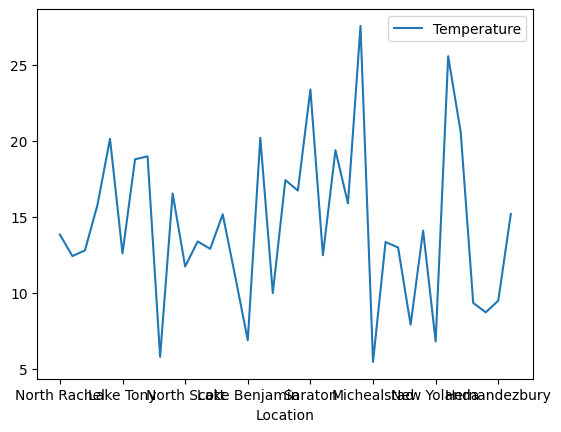

In [52]:
south_africa.plot.line('Location','Temperature');

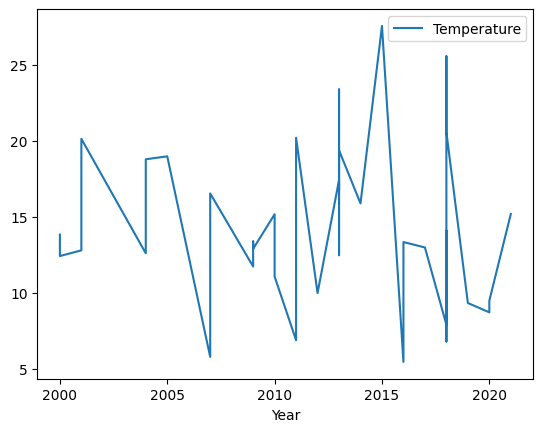

In [53]:
south_africa.plot.line('Year','Temperature');

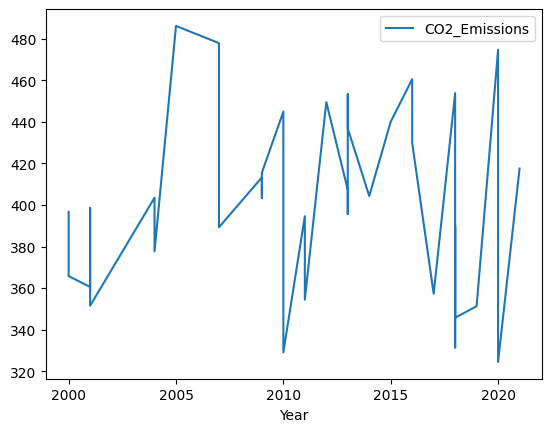

In [54]:
south_africa.plot.line('Year','CO2_Emissions');

In [55]:
#data.head(4)

In [56]:
south_africa.nunique()

Location          37
Country            1
Temperature       37
CO2_Emissions     37
Sea_Level_Rise    37
Precipitation     37
Humidity          37
Wind_Speed        37
Year              18
Month             12
Day               22
Time              37
dtype: int64

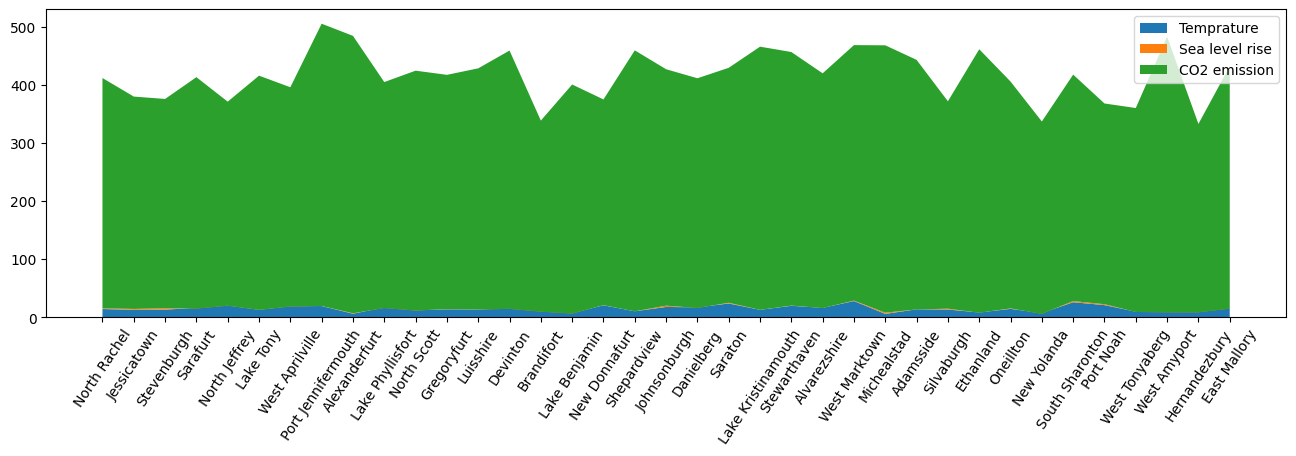

In [57]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=56)
plt.stackplot(south_africa.Location,south_africa.Temperature,south_africa.Sea_Level_Rise,south_africa.CO2_Emissions,labels=['Temprature','Sea level rise','CO2 emission'])
plt.legend()
plt.show()

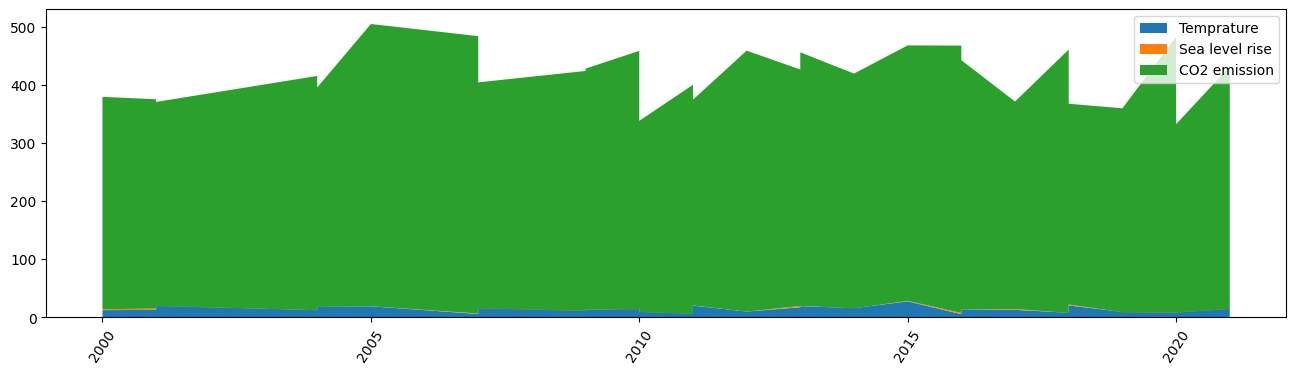

In [58]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=56)
plt.stackplot(south_africa.Year,south_africa.Temperature,south_africa.Sea_Level_Rise,south_africa.CO2_Emissions,labels=['Temprature','Sea level rise','CO2 emission'])
plt.legend()
plt.show()

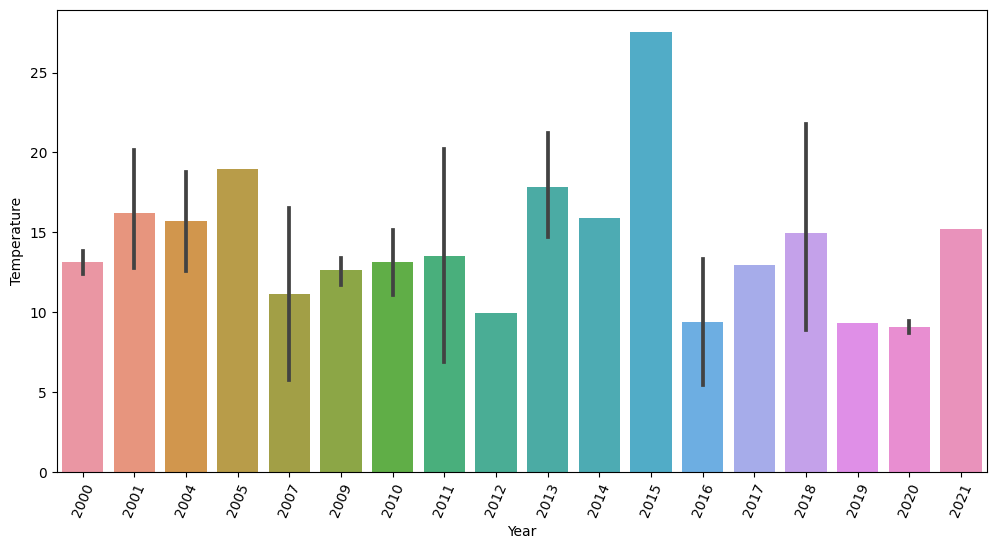

In [59]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=67)
sns.barplot(data=south_africa,x='Year',y='Temperature')
plt.show()

In [60]:
data.head(3)

,Location,Country,Temperature,CO2_Emissions,Sea_Level_Rise,Precipitation,Humidity,Wind_Speed,Year,Month,Day,Time
0,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026,2000,1,1,00:00:00
1,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300,2000,1,1,20:09:43.258325
2,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261,2000,1,2,16:19:26.516651


In [61]:
data.Sea_Level_Rise.mean()*100

-0.3151685483745901

In [62]:
data.Sea_Level_Rise.max()

4.116558983659821

In [63]:
sea2=data.query("Sea_Level_Rise>-0.3151685483745901")

In [64]:
sea2

,Location,Country,Temperature,CO2_Emissions,Sea_Level_Rise,Precipitation,Humidity,Wind_Speed,Year,Month,Day,Time
0,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026,2000,1,1,00:00:00
1,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300,2000,1,1,20:09:43.258325
2,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261,2000,1,2,16:19:26.516651
4,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164,2000,1,4,08:38:53.033303
5,South Nathan,Saint Helena,6.229326,392.473317,1.122210,76.368331,48.973886,30.398908,2000,1,5,04:48:36.291629
...,...,...,...,...,...,...,...,...,...,...,...,...
9993,South Joseph,Cameroon,17.667267,423.686881,1.033963,66.063186,35.660745,12.749542,2022,12,25,23:01:40.450044
9994,New Thomas,Mozambique,17.147936,414.475259,-0.046996,20.815504,39.215362,15.988626,2022,12,26,19:11:23.708370
9996,Leblancville,Congo,16.772451,346.921190,0.543616,49.882947,96.787402,42.249014,2022,12,28,11:30:50.225022
9997,West Stephanie,Argentina,22.370025,466.042136,1.026704,30.659841,15.211825,18.293708,2022,12,29,07:40:33.483348


In [67]:
india_data=data.query("Country=='India'")
india_data

,Location,Country,Temperature,CO2_Emissions,Sea_Level_Rise,Precipitation,Humidity,Wind_Speed,Year,Month,Day,Time
44,Stewartbury,India,13.863784,408.121863,-0.078811,77.498661,31.356005,26.264121,2000,2,6,23:07:43.366336
153,Port Jesus,India,14.563792,441.458510,0.012392,72.783893,64.897858,44.925654,2000,5,8,12:47:18.523852
420,Lake Heather,India,8.050407,352.500027,-1.081892,85.429837,90.573097,33.954562,2000,12,18,20:02:48.496849
604,Port Haydentown,India,12.435437,380.040060,-0.376124,92.218718,7.455810,41.320736,2001,5,22,09:51:28.028802
626,Marisafort,India,19.580143,412.246774,1.490122,55.683053,63.584592,44.651892,2001,6,9,21:25:19.711971
754,Jacobland,India,18.290347,312.602899,-0.556386,29.791763,29.240185,47.933234,2001,9,25,10:09:36.777677
764,South Kimberlyshire,India,12.013457,334.323596,-0.046268,55.820262,98.889572,32.544557,2001,10,3,19:46:49.360936
1437,New David,India,8.794670,352.886364,-0.773098,98.618001,99.591771,49.080657,2003,4,22,04:49:02.214221
2589,South Robertstad,India,18.649079,417.644878,-0.488305,74.032718,20.658963,43.859921,2005,12,14,23:27:35.805580
2805,Bowersfurt,India,15.702748,462.738893,-1.027062,67.324433,39.692066,27.317580,2006,6,14,10:27:19.603960


### sea level rise

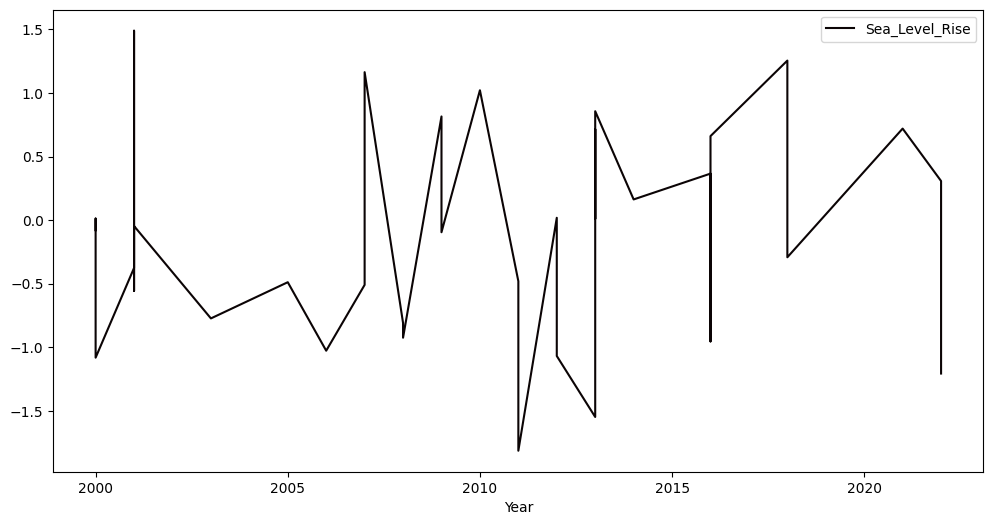

In [70]:
india_data.plot.line('Year','Sea_Level_Rise',figsize=(12,6),cmap='mako');

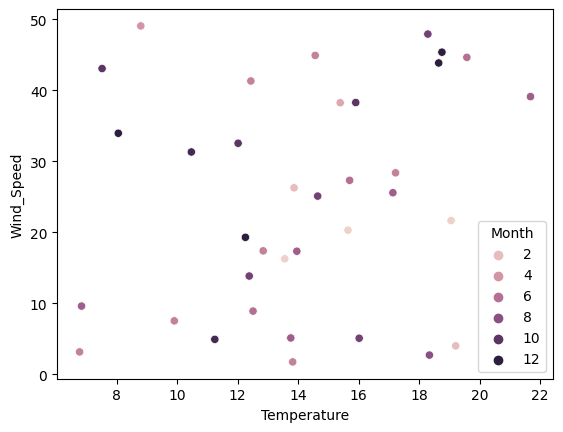

In [72]:
sns.scatterplot(data=india_data,x='Temperature',y='Wind_Speed',hue='Month')
plt.show()

[]

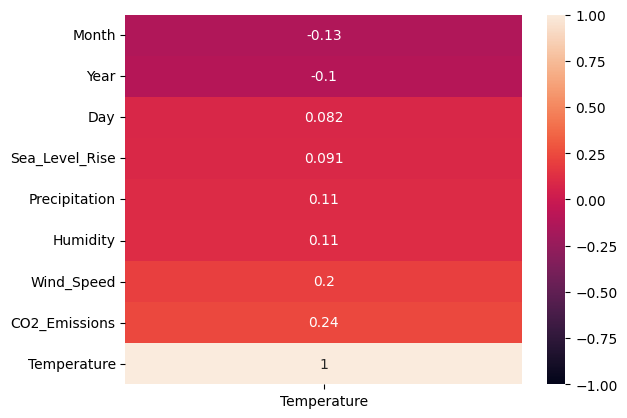

In [76]:
sns.heatmap(india_data.corr()[["Temperature"]].sort_values(by='Temperature'),vmin=-1,vmax=1,annot=True)
plt.plot()

In [78]:
co2_emission=data.sort_values(by='Year',ascending=True)
co2_emission

,Location,Country,Temperature,CO2_Emissions,Sea_Level_Rise,Precipitation,Humidity,Wind_Speed,Year,Month,Day,Time
0,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026,2000,1,1,00:00:00
297,Jayville,Togo,17.169481,469.369170,1.533553,44.081514,67.337406,43.861115,2000,9,6,12:07:07.722772
296,Lake Aaronside,Moldova,19.815760,508.030211,-0.141094,92.567496,1.659025,6.695514,2000,9,5,15:57:24.464446
295,North Codyfort,Philippines,5.111070,351.887476,1.159608,58.244277,93.306310,49.459624,2000,9,4,19:47:41.206120
294,Lake Willieton,Eritrea,20.526405,481.146674,-0.681992,85.550674,96.211887,32.170187,2000,9,3,23:37:57.947794
...,...,...,...,...,...,...,...,...,...,...,...,...
9704,Mariahside,Egypt,18.231620,331.419029,1.571194,37.103171,36.525214,19.725149,2022,4,27,04:12:18.793879
9703,North William,Hong Kong,12.716617,417.848630,-0.020604,79.178306,80.772211,1.610811,2022,4,26,08:02:35.535553
9702,Virginiaside,Bulgaria,13.016430,473.910996,-0.185892,9.800673,76.820439,22.001145,2022,4,25,11:52:52.277227
9713,Longview,India,9.903226,458.566159,-1.206748,57.588559,44.788664,7.515474,2022,5,4,17:39:48.118811


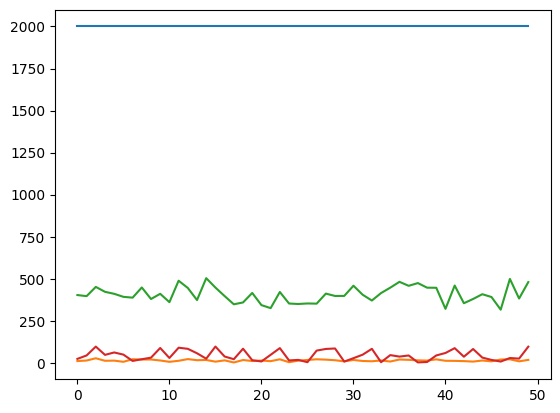

In [83]:
plt.plot(data[:50].Year)
plt.plot(data[:50].Temperature)
plt.plot(data[:50].CO2_Emissions)
plt.plot(data[:50].Humidity)